In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [3]:
drs_schroeder = np.loadtxt("../data/schroeder.dat")
drs_watanabe = np.loadtxt("../data/watanabe.dat")

In [4]:
def cole_davidson(nu, S, beta, tau):
    tau = tau * 1e-3
    eps = S / (1 + 2j * np.pi * nu * tau) ** (beta)
    return eps.real, np.abs(eps.imag)


def debye(nu, S, tau):
    tau = tau * 1e-3
    eps = S / (1 + 2j * np.pi * nu * tau)
    return eps.real, np.abs(eps.imag)


nu = 10 ** (np.linspace(-2, 4, 100))
# eps = {'static': 27.1, 'infty': 4.11}
e_0 = 27.1
e_infty = 4.11
CD = {"S": 17.1, "beta": 0.899, "tau": 130}
D1 = {"S": 4.21, "tau": 14.9}
D2 = {"S": 1.68, "tau": 2.72}

CD_25 = {"S": 23.8, "beta": 0.734, "tau": 416}
D1_25 = {"S": 2.50, "tau": 28.0}
D2_25 = {"S": 1.48, "tau": 2.55}
e_infty_25 = 3.95

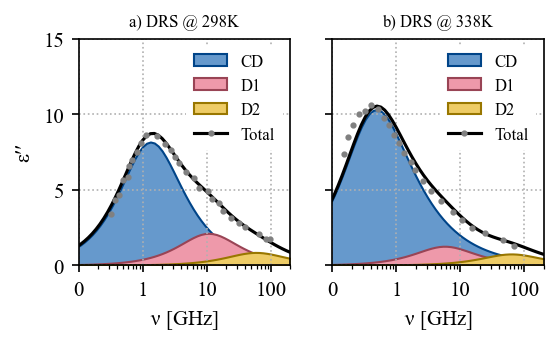

In [5]:
from matplotlib.ticker import FormatStrFormatter, ScalarFormatter

f, axs = plt.subplots(1, 2, figsize=[4, 2], dpi=150, sharey=True)

e1_p, e1_pp = cole_davidson(nu, **CD)
e2_p, e2_pp = debye(nu, **D1)
e3_p, e3_pp = debye(nu, **D2)
e_pp = e1_pp + e2_pp + e3_pp
e_p = e_infty + e1_p + e2_p + e3_p

ax = axs[0]
ax.grid()
l1 = ax.fill_between(nu, 0, e1_pp, ec="C0", fc="C3")
l2 = ax.fill_between(nu, 0, e2_pp, ec="C1", fc="C4")
l3 = ax.fill_between(nu, 0, e3_pp, ec="C2", fc="C5")
(l4,) = ax.plot(nu, e_pp, color="k")
# (l5,) = ax.plot(nu, e_p, "--", color="k")
(l6,) = ax.plot(
    drs_watanabe[:, 0],
    drs_watanabe[:, 1],
    "o",
    color="gray",
    ms=2,
)


ax.set_xscale("log")
ax.set_xlim(0.1, 200)
ax.xaxis.set_major_formatter(FormatStrFormatter("%.0f"))
ax.set_xlabel(R"$\nu$ [GHz]")
ax.legend(
    [l1, l2, l3, (l4, l6)],
    ["CD", "D1", "D2", "Total"],
    prop={"size": 8},
    frameon=True,
    edgecolor="w",
    framealpha=1,
)

ax = axs[1]
e1_p, e1_pp = cole_davidson(nu, **CD_25)
e2_p, e2_pp = debye(nu, **D1_25)
e3_p, e3_pp = debye(nu, **D2_25)
e_pp = e1_pp + e2_pp + e3_pp
e_p = e_infty_25 + e1_p + e2_p + e3_p

ax.grid()
ax.set_xscale("log")
ax.set_xlim(0.1, 200)
l1 = ax.fill_between(nu, 0, e1_pp, ec="C0", fc="C3")
l2 = ax.fill_between(nu, 0, e2_pp, ec="C1", fc="C4")
l3 = ax.fill_between(nu, 0, e3_pp, ec="C2", fc="C5")
(l4,) = ax.plot(nu, e_pp, color="k")
(l6,) = ax.plot(
    drs_schroeder[::2, 0] / 2 / np.pi,
    drs_schroeder[::2, 1],
    "o",
    color="gray",
    ms=2,
)
ax.xaxis.set_major_formatter(FormatStrFormatter("%.0f"))
ax.set_xlabel(R"$\nu$ [GHz]")
ax.legend(
    [l1, l2, l3, (l4, l6)],
    ["CD", "D1", "D2", "Total"],
    prop={"size": 8},
    frameon=True,
    edgecolor="w",
    framealpha=1,
)
ax.set_ylim(0, 15)
axs[0].set_title("a) DRS @ 298K", fontsize=8)
axs[1].set_title("b) DRS @ 338K", fontsize=8)
axs[0].set_ylabel(R"$\epsilon\prime\prime$")

plt.savefig("drs_fit.pdf")

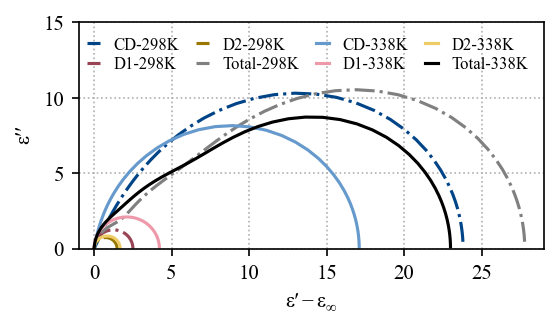

In [124]:
from matplotlib.ticker import FormatStrFormatter, ScalarFormatter

f, ax = plt.subplots(1, 1, figsize=[4, 2], dpi=150)

ax.grid()

e1_p, e1_pp = cole_davidson(nu, **CD_25)
e2_p, e2_pp = debye(nu, **D1_25)
e3_p, e3_pp = debye(nu, **D2_25)
e_pp = e1_pp + e2_pp + e3_pp
e_p = e1_p + e2_p + e3_p

ax.plot(e1_p, e1_pp, ls="-.")
ax.plot(e2_p, e2_pp, ls="-.")
ax.plot(e3_p, e3_pp, ls="-.")
ax.plot(e_p, e_pp, "gray", ls="-.")

e1_p, e1_pp = cole_davidson(nu, **CD)
e2_p, e2_pp = debye(nu, **D1)
e3_p, e3_pp = debye(nu, **D2)
e_pp = e1_pp + e2_pp + e3_pp
e_p = e1_p + e2_p + e3_p

ax.plot(e1_p, e1_pp)
ax.plot(e2_p, e2_pp)
ax.plot(e3_p, e3_pp)
ax.plot(e_p, e_pp, "k")

ax.set_ylim(0, 15)
ax.set_xlim(-1, 29)
ax.set_ylabel(R"$\epsilon\prime\prime$")
ax.set_xlabel(R"$\epsilon\prime - \epsilon_{\infty}$")


ax.legend(
    [
        "CD-298K",
        "D1-298K",
        "D2-298K",
        "Total-298K",
        "CD-338K",
        "D1-338K",
        "D2-338K",
        "Total-338K",
    ],
    prop={"size": 8},
    ncol=4,
    handlelength=0.8,
    columnspacing=1,
    labelspacing=0.2,
)

plt.savefig("drs_locus.pdf")